In [82]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [83]:
pip install requests beautifulsoup4 lxml pandas


In [84]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

html = requests.get(url, headers=headers).text
soup = BeautifulSoup(response.text, "html.parser")

table = soup.find("table", class_=lambda x: x and "wikitable" in x)
rows = table.find("tbody").find_all("tr")

data = []

last_headquarters = None
last_industry = None

for row in rows:
    cells = row.find_all(["th", "td"])
    texts = [c.get_text(strip=True) for c in cells]

    # Handle rowspan logic
    if len(texts) == 9:
        last_headquarters = texts[6]
        last_industry = texts[2]
    elif len(texts) == 8:
        # missing headquarters
        texts.insert(6, last_headquarters)
    elif len(texts) == 7:
        # missing industry & headquarters
        texts.insert(2, last_industry)
        texts.insert(6, last_headquarters)

    if len(texts) == 9:
        data.append(texts)

columns = [
    "Rank", "Name", "Industry", "Revenue",
    "Profit", "Employees", "Headquarters",
    "State-owned", "Reference"
]

df = pd.DataFrame(data, columns=columns)


In [85]:
df

,Rank,Name,Industry,Revenue,Profit,Employees,Headquarters,State-owned,Reference
0,Ranks,Name,Industry,Revenue,Profit,Employees,Headquarters[note 1],State-owned,Ref.
1,1,Walmart,Retail,"$680,985","$19,436","2,100,000",United States,,[1]
2,2,Amazon,Retailinformation technology,"$637,959","$59,248","1,556,000",United States,,[5]
3,3,State Grid Corporation of China,Electricity,"$545,948","$9,204","1,361,423",China,,[6]
4,4,Saudi Aramco,Oil and gas,"$480,446","$106,246","73,311",Saudi Arabia,,[7]
5,5,China National Petroleum Corporation,"$476,000","$25,250","1,026,301",China,Saudi Arabia,,[8]
6,6,China Petrochemical Corporation,Oil and gas,"$429,700","$9,393","513,434",Saudi Arabia,,[9]
7,7,UnitedHealth Group,Healthcare,"$400,278","$14,405","400,000",United States,,[10]
8,8,Apple,Information technology,"$391,035","$93,736","164,000",United States,,[11]
9,9,Berkshire Hathaway,Financials,"$371,433","$88,995","392,400",United States,,[12]


In [86]:
df.isnull().sum()

,0
Rank,0
Name,0
Industry,0
Revenue,0
Profit,0
Employees,0
Headquarters,0
State-owned,0
Reference,0


So row index 0 and 1 are headers, not actual data removing it

In [87]:
df = df.iloc[1:].reset_index(drop=True)


In [88]:
df = df.drop(columns=['Reference', 'State-owned'])


In [89]:
df

,Rank,Name,Industry,Revenue,Profit,Employees,Headquarters
0,1,Walmart,Retail,"$680,985","$19,436","2,100,000",United States
1,2,Amazon,Retailinformation technology,"$637,959","$59,248","1,556,000",United States
2,3,State Grid Corporation of China,Electricity,"$545,948","$9,204","1,361,423",China
3,4,Saudi Aramco,Oil and gas,"$480,446","$106,246","73,311",Saudi Arabia
4,5,China National Petroleum Corporation,"$476,000","$25,250","1,026,301",China,Saudi Arabia
5,6,China Petrochemical Corporation,Oil and gas,"$429,700","$9,393","513,434",Saudi Arabia
6,7,UnitedHealth Group,Healthcare,"$400,278","$14,405","400,000",United States
7,8,Apple,Information technology,"$391,035","$93,736","164,000",United States
8,9,Berkshire Hathaway,Financials,"$371,433","$88,995","392,400",United States
9,10,CVS Health,Healthcare,"$357,776","$8,344","259,500",United States


In [90]:
# lets reassign columns name for avoid hidden issues later
df.columns = [
    "Rank",
    "Name",
    "Industry",
    "Revenue",
    "Profit",
    "Employees",
    "Headquarters"
]



In [91]:
df.head()

,Rank,Name,Industry,Revenue,Profit,Employees,Headquarters
0,1,Walmart,Retail,"$680,985","$19,436","2,100,000",United States
1,2,Amazon,Retailinformation technology,"$637,959","$59,248","1,556,000",United States
2,3,State Grid Corporation of China,Electricity,"$545,948","$9,204","1,361,423",China
3,4,Saudi Aramco,Oil and gas,"$480,446","$106,246","73,311",Saudi Arabia
4,5,China National Petroleum Corporation,"$476,000","$25,250","1,026,301",China,Saudi Arabia


In [92]:
# taking top 20 and saving for further analysis

In [124]:
df=df.head(20).copy()

In [94]:
df.shape

(20, 7)

In [95]:
df

,Rank,Name,Industry,Revenue,Profit,Employees,Headquarters
0,1,Walmart,Retail,"$680,985","$19,436","2,100,000",United States
1,2,Amazon,Retailinformation technology,"$637,959","$59,248","1,556,000",United States
2,3,State Grid Corporation of China,Electricity,"$545,948","$9,204","1,361,423",China
3,4,Saudi Aramco,Oil and gas,"$480,446","$106,246","73,311",Saudi Arabia
4,5,China National Petroleum Corporation,"$476,000","$25,250","1,026,301",China,Saudi Arabia
5,6,China Petrochemical Corporation,Oil and gas,"$429,700","$9,393","513,434",Saudi Arabia
6,7,UnitedHealth Group,Healthcare,"$400,278","$14,405","400,000",United States
7,8,Apple,Information technology,"$391,035","$93,736","164,000",United States
8,9,Berkshire Hathaway,Financials,"$371,433","$88,995","392,400",United States
9,10,CVS Health,Healthcare,"$357,776","$8,344","259,500",United States


In [96]:
#data cleaning


Fixing missing Industry by replace

In [97]:
import numpy as np
df["Industry"] = df["Industry"].replace({
    "": "Oil and gas",
    np.nan: "Oil and gas"
})

/tmp/ipython-input-1880198528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Industry"] = df["Industry"].replace({


In [98]:
df

,Rank,Name,Industry,Revenue,Profit,Employees,Headquarters
0,1,Walmart,Retail,"$680,985","$19,436","2,100,000",United States
1,2,Amazon,Retailinformation technology,"$637,959","$59,248","1,556,000",United States
2,3,State Grid Corporation of China,Electricity,"$545,948","$9,204","1,361,423",China
3,4,Saudi Aramco,Oil and gas,"$480,446","$106,246","73,311",Saudi Arabia
4,5,China National Petroleum Corporation,"$476,000","$25,250","1,026,301",China,Saudi Arabia
5,6,China Petrochemical Corporation,Oil and gas,"$429,700","$9,393","513,434",Saudi Arabia
6,7,UnitedHealth Group,Healthcare,"$400,278","$14,405","400,000",United States
7,8,Apple,Information technology,"$391,035","$93,736","164,000",United States
8,9,Berkshire Hathaway,Financials,"$371,433","$88,995","392,400",United States
9,10,CVS Health,Healthcare,"$357,776","$8,344","259,500",United States


let’s fix Industry and Employees for those incorrect rows according to website

In [99]:
df.loc[df["Name"] == "China National Petroleum Corporation", "Industry"] = "Oil and gas"


In [100]:
#Fix Employees column
mask = df["Employees"].astype(str).str.contains("[A-Za-z]", na=False)


In [101]:
df.loc[mask, "Employees"] = "1,026,301"
#That’s the correct value already present in the row in website data


In [102]:
#Fix Headquarters Columns
df.loc[df["Name"] == "China National Petroleum Corporation", "Headquarters"] = "China"


In [103]:
df

,Rank,Name,Industry,Revenue,Profit,Employees,Headquarters
0,1,Walmart,Retail,"$680,985","$19,436","2,100,000",United States
1,2,Amazon,Retailinformation technology,"$637,959","$59,248","1,556,000",United States
2,3,State Grid Corporation of China,Electricity,"$545,948","$9,204","1,361,423",China
3,4,Saudi Aramco,Oil and gas,"$480,446","$106,246","73,311",Saudi Arabia
4,5,China National Petroleum Corporation,Oil and gas,"$25,250","1,026,301","1,026,301",China
5,6,China Petrochemical Corporation,Oil and gas,"$429,700","$9,393","513,434",Saudi Arabia
6,7,UnitedHealth Group,Healthcare,"$400,278","$14,405","400,000",United States
7,8,Apple,Information technology,"$391,035","$93,736","164,000",United States
8,9,Berkshire Hathaway,Financials,"$371,433","$88,995","392,400",United States
9,10,CVS Health,Healthcare,"$357,776","$8,344","259,500",United States


In [104]:
#Now our dataset is cleaned ready for analysis

Performing EDA

In [105]:
df.shape

(20, 7)

In [106]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          20 non-null     object
 1   Name          20 non-null     object
 2   Industry      20 non-null     object
 3   Revenue       20 non-null     object
 4   Profit        20 non-null     object
 5   Employees     20 non-null     object
 6   Headquarters  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Revenue & Profit are strings → need numeric conversion

Employees is numeric

No major missing values after cleaning

In [107]:
# Convert Revenue & Profit to numeric
df["Revenue"] = (
    df["Revenue"].str.replace("$", "").str.replace(",", "").astype(int)
)

df["Profit"] = (
    df["Profit"].str.replace("$", "").str.replace(",", "").astype(int)
)


/tmp/ipython-input-1978371009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Revenue"] = (
/tmp/ipython-input-1978371009.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Profit"] = (


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          20 non-null     object
 1   Name          20 non-null     object
 2   Industry      20 non-null     object
 3   Revenue       20 non-null     int64 
 4   Profit        20 non-null     int64 
 5   Employees     20 non-null     object
 6   Headquarters  20 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.2+ KB


In [113]:
df.describe()


,Revenue,Profit
count,20.000000,2.000000e+01
mean,375163.700000,8.833865e+04
std,139408.096431,2.239951e+05
min,25250.000000,1.745000e+03
25%,318327.750000,9.345750e+03
50%,349213.000000,1.939750e+04
75%,407633.500000,9.018025e+04
max,680985.000000,1.026301e+06


In [112]:
df

,Rank,Name,Industry,Revenue,Profit,Employees,Headquarters
0,1,Walmart,Retail,680985,19436,"2,100,000",United States
1,2,Amazon,Retailinformation technology,637959,59248,"1,556,000",United States
2,3,State Grid Corporation of China,Electricity,545948,9204,"1,361,423",China
3,4,Saudi Aramco,Oil and gas,480446,106246,"73,311",Saudi Arabia
4,5,China National Petroleum Corporation,Oil and gas,25250,1026301,"1,026,301",China
5,6,China Petrochemical Corporation,Oil and gas,429700,9393,"513,434",Saudi Arabia
6,7,UnitedHealth Group,Healthcare,400278,14405,"400,000",United States
7,8,Apple,Information technology,391035,93736,"164,000",United States
8,9,Berkshire Hathaway,Financials,371433,88995,"392,400",United States
9,10,CVS Health,Healthcare,357776,8344,"259,500",United States


***Insights***

---



**Revenue**

Mean revenue is extremely high → right-skewed

A few giants (Walmart, Amazon, Saudi Aramco) dominate

**Profit**

Very high variance

Some companies earn massive profit with fewer employees

**Employees**

Ranges from thousands to millions

Indicates different business models

DATA VISUALIZATION

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns


In [115]:
#finding Top 10 Companies by Revenue using (Bar Chart)
top10_revenue = df.sort_values("Revenue", ascending=False).head(10)

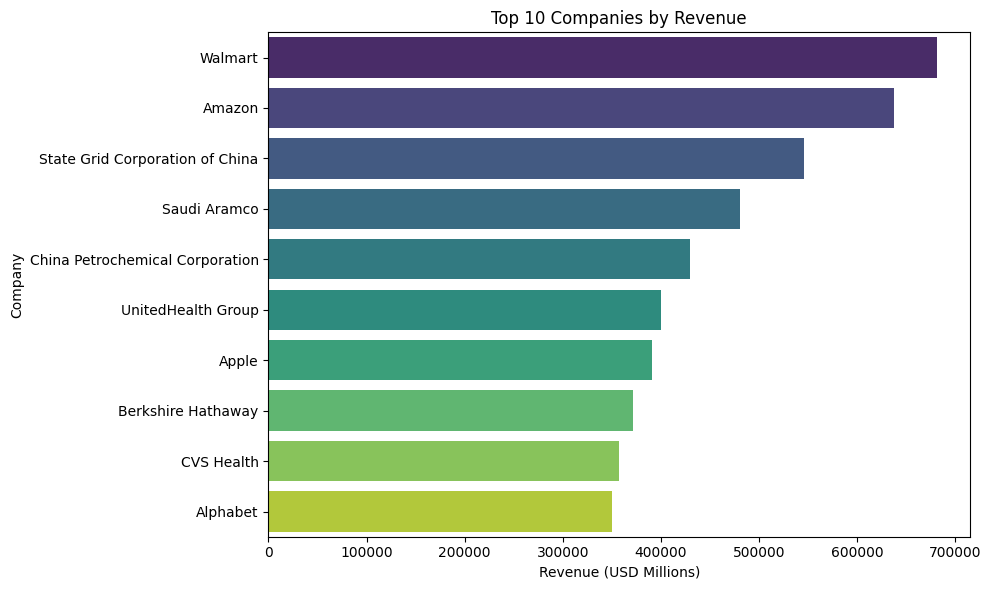

In [117]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_revenue,
    x="Revenue",
    y="Name",
    hue="Name",  # Add color based on company name
    palette="viridis", # Choose a color palette
    legend=False # Hide the legend if individual colors are not needed
)

plt.title("Top 10 Companies by Revenue")
plt.xlabel("Revenue (USD Millions)")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

Top 10 Companies by Profit

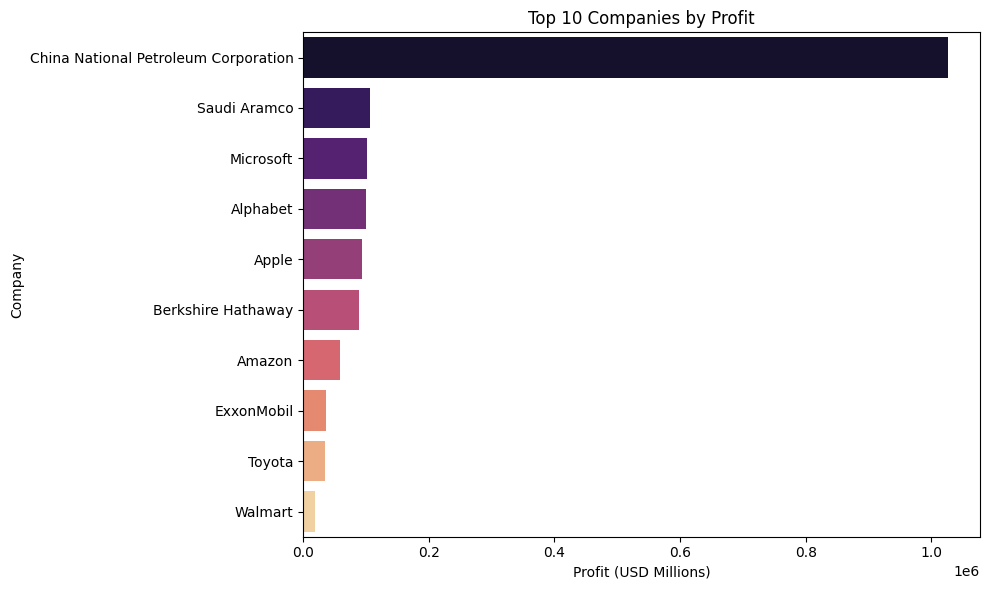

In [119]:
top10_profit = df.sort_values("Profit", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_profit,
    x="Profit",
    y="Name",
    hue="Name",
    palette="magma", # Another color palette
    legend=False
)

plt.title("Top 10 Companies by Profit")
plt.xlabel("Profit (USD Millions)")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

**Finding Profit Margin Distribution**

/tmp/ipython-input-414116483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Profit_Margin_%"] = (df["Profit"] / df["Revenue"]) * 100


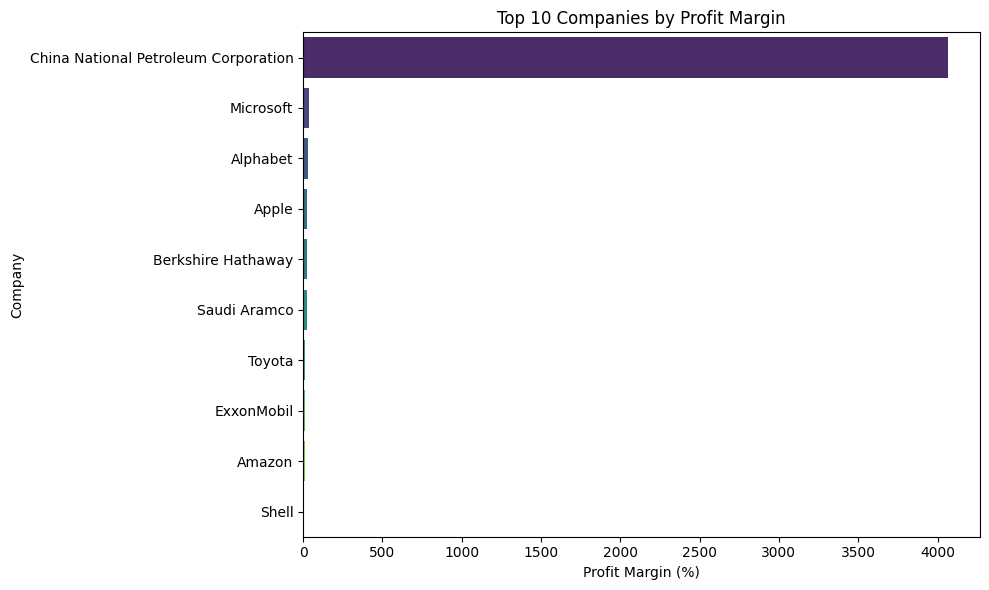

In [122]:
df["Profit_Margin_%"] = (df["Profit"] / df["Revenue"]) * 100

top10_margin = df.sort_values("Profit_Margin_%", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_margin,
    x="Profit_Margin_%",
    y="Name",
    hue="Name", # Add color based on company name
    palette="viridis", # Choose a color palette
    legend=False # Hide the legend if individual colors are not needed
)

plt.title("Top 10 Companies by Profit Margin")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

In [123]:
#Finding Company Count by Industry

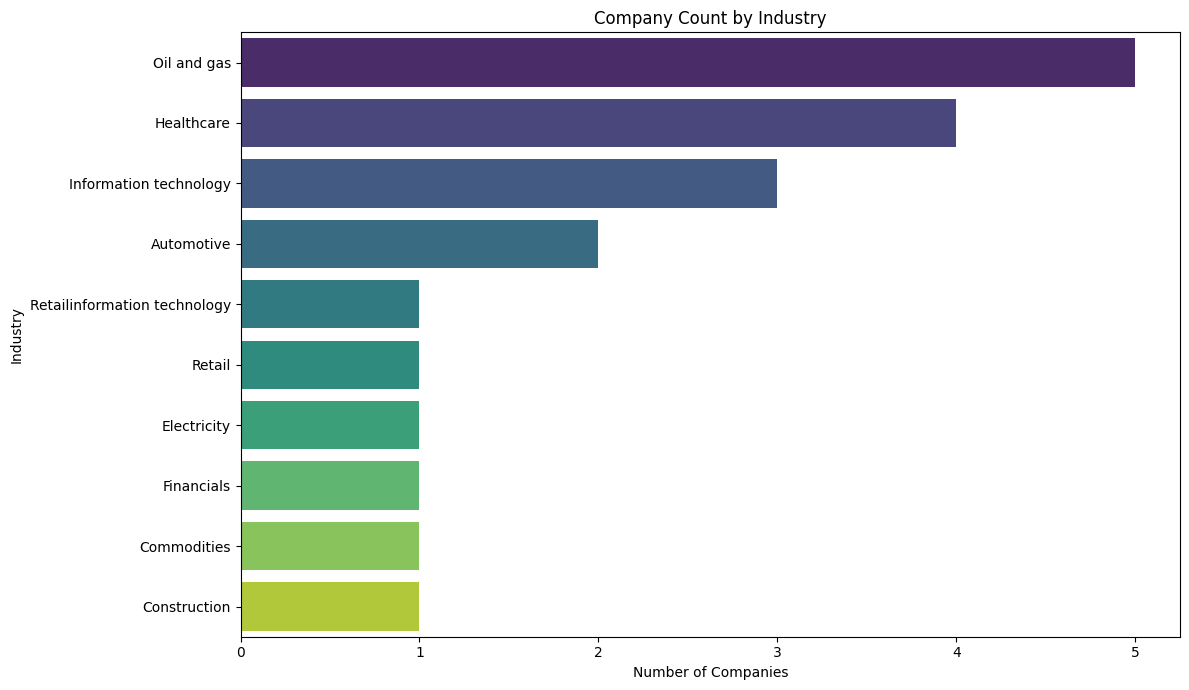

In [129]:
industry_counts = df["Industry"].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=industry_counts.values, y=industry_counts.index, hue=industry_counts.index, palette="viridis", legend=False)
plt.title("Company Count by Industry")
plt.xlabel("Number of Companies")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

In [130]:
#Average Revenue by Industry

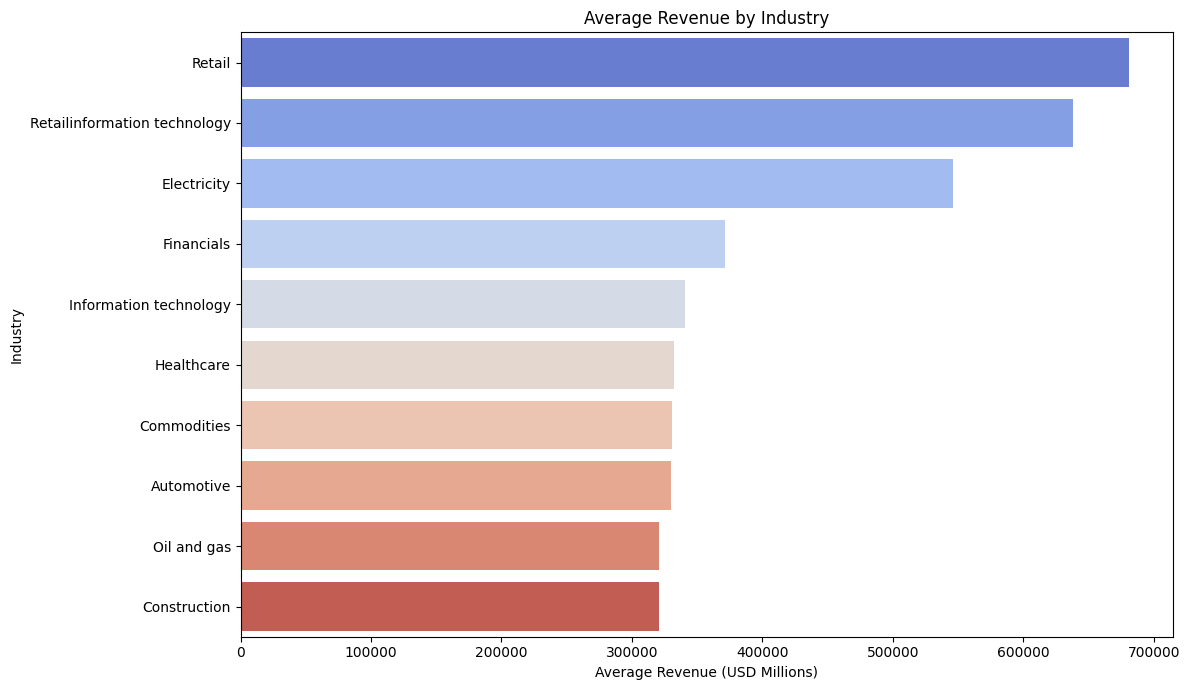

In [131]:
average_revenue_by_industry = df.groupby("Industry")["Revenue"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=average_revenue_by_industry.values, y=average_revenue_by_industry.index, hue=average_revenue_by_industry.index, palette="coolwarm", legend=False)
plt.title("Average Revenue by Industry")
plt.xlabel("Average Revenue (USD Millions)")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

Finding Employees vs Revenue & Profit Relationship using scatter plot

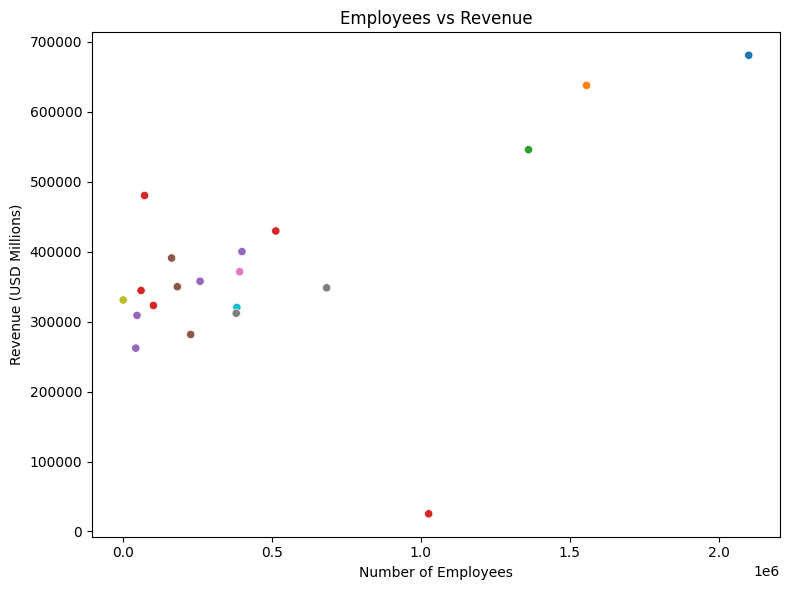

In [135]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Employees",
    y="Revenue",
    hue="Industry",
    legend=False
)

plt.title("Employees vs Revenue")
plt.xlabel("Number of Employees")
plt.ylabel("Revenue (USD Millions)")
plt.tight_layout()
plt.show()


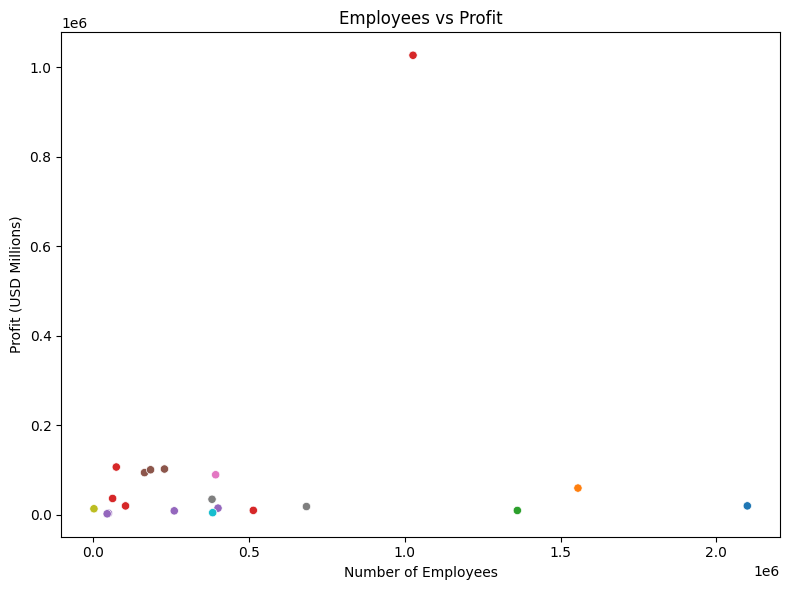

In [136]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Employees",
    y="Profit",
    hue="Industry",
    legend=False
)

plt.title("Employees vs Profit")
plt.xlabel("Number of Employees")
plt.ylabel("Profit (USD Millions)")
plt.tight_layout()
plt.show()


**Interpretation**

More employees → not always more profit

Some companies achieve high profit with fewer staff

Workforce efficiency matters more than size

**Conclusion:-** I visualized revenue, profit, and workforce data to show how business models differ across industries. The analysis revealed that profitability is driven more by efficiency and margins than employee count or revenue scale.

